In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder


%matplotlib inline

/home/y.romanikhin/.virtualenvs/venv/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [52]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

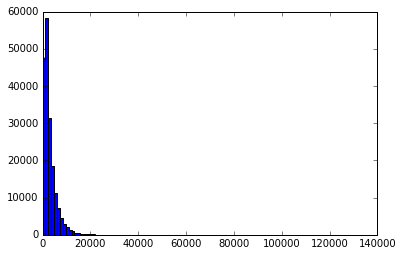

In [53]:
plt.hist(train['loss'], bins = 100, log = False)
plt.show()

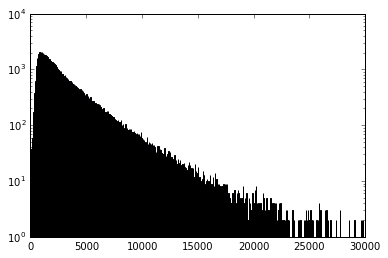

In [56]:
plt.hist(train['loss'], bins = 1000, log = True)
plt.show()

In [55]:
train = train[train.loss < 30000]
train = train[train.loss > 100]

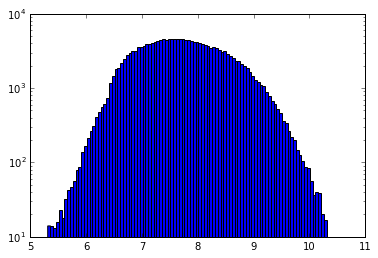

In [120]:
plt.hist(np.log(train['loss']+100), bins = 100, log = True)
plt.show()

In [61]:
for column in train.columns:
    if train[column].nunique() < 60 :
        print column, np.array(sorted(train[column].unique()))
    else :
        print column, train[column].nunique()

id 188195
cat1 ['A' 'B']
cat2 ['A' 'B']
cat3 ['A' 'B']
cat4 ['A' 'B']
cat5 ['A' 'B']
cat6 ['A' 'B']
cat7 ['A' 'B']
cat8 ['A' 'B']
cat9 ['A' 'B']
cat10 ['A' 'B']
cat11 ['A' 'B']
cat12 ['A' 'B']
cat13 ['A' 'B']
cat14 ['A' 'B']
cat15 ['A' 'B']
cat16 ['A' 'B']
cat17 ['A' 'B']
cat18 ['A' 'B']
cat19 ['A' 'B']
cat20 ['A' 'B']
cat21 ['A' 'B']
cat22 ['A' 'B']
cat23 ['A' 'B']
cat24 ['A' 'B']
cat25 ['A' 'B']
cat26 ['A' 'B']
cat27 ['A' 'B']
cat28 ['A' 'B']
cat29 ['A' 'B']
cat30 ['A' 'B']
cat31 ['A' 'B']
cat32 ['A' 'B']
cat33 ['A' 'B']
cat34 ['A' 'B']
cat35 ['A' 'B']
cat36 ['A' 'B']
cat37 ['A' 'B']
cat38 ['A' 'B']
cat39 ['A' 'B']
cat40 ['A' 'B']
cat41 ['A' 'B']
cat42 ['A' 'B']
cat43 ['A' 'B']
cat44 ['A' 'B']
cat45 ['A' 'B']
cat46 ['A' 'B']
cat47 ['A' 'B']
cat48 ['A' 'B']
cat49 ['A' 'B']
cat50 ['A' 'B']
cat51 ['A' 'B']
cat52 ['A' 'B']
cat53 ['A' 'B']
cat54 ['A' 'B']
cat55 ['A' 'B']
cat56 ['A' 'B']
cat57 ['A' 'B']
cat58 ['A' 'B']
cat59 ['A' 'B']
cat60 ['A' 'B']
cat61 ['A' 'B']
cat62 ['A' 'B']
cat63 [

In [195]:
all_data = pd.concat([train, test])

In [65]:
for column in all_data :
    encoder = LabelEncoder()
    if column.startswith('cat') :
        all_data[column] = encoder.fit_transform(all_data[column])

In [90]:
all_data = all_data.set_index("id")
features = np.array([column for column in all_data.columns if column != 'loss'])

In [92]:
train = all_data[:train.shape[0]]
test = all_data[train.shape[0]:]

## Hold out set for parameters tuning

In [99]:
from sklearn.model_selection import train_test_split

train_local, validation = train_test_split(
    train, 
    test_size = 0.2, 
    random_state = 0
)

### Try xgb

In [196]:
offset = 50

In [202]:
param = {}
param['max_depth'] = 7
param['booster'] = 'gbtree'
param['objective'] = 'reg:linear'
param['eval_metric'] = 'rmse'
param['eta'] = 0.1
param['subsample'] = 0.7
param['colsample_bytree'] = 0.7
param['colsample_bylevel'] = 0.9
param['min_child_weight'] = 1
param['gamma'] = 0
param['reg_lambda'] = 0
param['scale_pos_weight'] = 1
param["nthreads"] = 24

numround = 7000

In [209]:
Xdatatrain = xgb.DMatrix(train_local[features], label = np.log(train_local["loss"]+offset))
Xdataval = xgb.DMatrix(validation[features], label = np.log(validation["loss"]+offset))

X_all_datatrain = xgb.DMatrix(train[features], label = np.log(train["loss"]+offset))
Xdatatest = xgb.DMatrix(test)

plst = list(param.items())
watchlist = [(Xdatatrain, 'train'), (Xdataval, 'eval')]            

In [204]:
%%time
xgb.cv(param, X_all_datatrain, num_boost_round=1000000, nfold=2, metrics="rmse", \
       verbose_eval=1, early_stopping_rounds=50, seed=0)

[0]	train-rmse:51.4729+9.75e-05	test-rmse:51.4728+0.0003545
[1]	train-rmse:46.3264+0.00024	test-rmse:46.3263+0.0005815
[2]	train-rmse:41.6948+0.000269	test-rmse:41.6946+0.0006085
[3]	train-rmse:37.526+0.0002155	test-rmse:37.5259+0.0005305
[4]	train-rmse:33.7743+0.0003665	test-rmse:33.7743+0.0007385
[5]	train-rmse:30.3981+0.0005465	test-rmse:30.3981+0.000902
[6]	train-rmse:27.3596+0.000476	test-rmse:27.3597+0.000844
[7]	train-rmse:24.625+0.000386	test-rmse:24.6251+0.0007325
[8]	train-rmse:22.1638+0.00037	test-rmse:22.1638+0.000679
[9]	train-rmse:19.9488+0.000428	test-rmse:19.949+0.000821
[10]	train-rmse:17.9558+0.000475	test-rmse:17.956+0.0008315
[11]	train-rmse:16.162+0.000453	test-rmse:16.1624+0.000799
[12]	train-rmse:14.548+0.0003755	test-rmse:14.5484+0.0007535
[13]	train-rmse:13.0955+0.0003975	test-rmse:13.0959+0.000773
[14]	train-rmse:11.7885+0.000254	test-rmse:11.7889+0.0007045
[15]	train-rmse:10.6126+0.0001805	test-rmse:10.6129+0.0006495
[16]	train-rmse:9.55449+4.9e-05	test-rmse:

KeyboardInterrupt: 

In [273]:
model = xgb.XGBRegressor(max_depth = 10, learning_rate = 0.003, subsample=0.7, 
                         colsample_bytree=0.7, gamma=0.05,
                         n_estimators = 100000, silent = False, nthread = -1,)

In [274]:
%%time 

model.fit(
    train_local[features].values, 
    np.log(train_local['loss'].values + offset), 
    eval_set = [(
        validation[features].values, 
        np.log(validation['loss'].values + offset)
    )], 
    early_stopping_rounds = 50,
    verbose = False,
    #eval_metric = "mae",
)

CPU times: user 2h 22min 48s, sys: 4.17 s, total: 2h 22min 52s
Wall time: 2h 22min 54s


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.7,
       gamma=0.05, learning_rate=0.003, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=100000, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=0.7)

In [288]:
p = np.exp(model.predict(validation[features].values)) - offset

score = mae(p, validation['loss'])
score

1124.686398554112

In [276]:
model.n_estimators

100000

In [216]:
model.n_estimators = int(model.best_iteration / 0.9)
model.n_estimators

303

In [289]:
model.fit(train[features].values, np.log(train['loss']+offset), 
                early_stopping_rounds = 50,
                verbose = False,)

IndexError: list index out of range

In [304]:
pred_xgb1 = np.exp(model.predict(test[features].values)) - offset

KeyboardInterrupt: 

In [ ]:
test.loc[:, 'loss'] = pred_xgb1
test.reset_index()[['id', 'loss']].to_csv('submissions/xgboost_basic_v1.csv', index = False)
!gzip -f submissions/xgboost_basic_v1.csv

### 1163.21685 on Public

In [256]:
RGFRegressor??

In [292]:
%%time
from rgf.rgf import RGFRegressor

rgf = RGFRegressor(max_leaf=1000,
                   algorithm="RGF",
                   test_interval=100, loss='LS', l2=0.01, sl2=None, reg_depth=1, verbose=1)

rgf.fit(train_local[features], np.log(train_local['loss'].values + offset))

"train": 
   algorithm=RGF
   train_x_fn=/tmp/rgf/train.data.x
   train_y_fn=/tmp/rgf/train.data.y
   Log:ON
   model_fn_prefix=/tmp/rgf/model
--------------------
Thu Dec  1 08:56:03 2016: Reading training data ... 
Thu Dec  1 08:56:06 2016: Start ... #train=150556
--------------------
Forest-level: 
   loss=LS
   max_leaf_forest=1000
   max_tree=500
   opt_interval=100
   test_interval=100
   num_tree_search=1
   Verbose:ON
   memory_policy=Generous
-------------
Training data: 130x150556, nonzero_ratio=0.3874; managed as sparse data.
-------------
Optimization: 
   loss=LS
   num_iteration_opt=10
   reg_L2=0.01
   opt_stepsize=0.5
   NormalizeTarget:ON
Tree-level: min_pop=10
Node split: reg_L2=0.01
--------------------
Thu Dec  1 08:56:20 2016: Calling optimizer with 36 trees and 101 leaves
Thu Dec  1 08:56:21 2016: Writing model: seq#=1
Thu Dec  1 08:56:32 2016: Calling optimizer with 56 trees and 201 leaves
Thu Dec  1 08:56:33 2016: Writing model: seq#=2
Thu Dec  1 08:56:44 2016: 

In [293]:
p2 = np.exp(rgf.predict(validation[features].values)) - offset

score = mae(p2, validation['loss'])
score

"predict": 
   model_fn=/tmp/rgf/model-10
   test_x_fn=/tmp/rgf/test.data.x
   prediction_fn=/tmp/rgf/predictions.txt
   Log:ON
--------------------
Thu Dec  1 08:58:02 2016: Reading test data ... 
Thu Dec  1 08:58:02 2016: Predicting ... 
elapsed: 0.29
/tmp/rgf/predictions.txt: /tmp/rgf/model-10,#leaf=1000,#tree=126
Thu Dec  1 08:58:03 2016: Done ... 

None


1137.2062748926799

In [ ]:

1137.4185345454589 - 1000/l2=0.01/test=10/reg_depth=1/RGF
1153.7713393629185 - 1000/l2=0.001/test=100/reg_depth=1/RGF
1185.3784760885585 - 1000/l2=0.0/test=100/reg_depth=1/RGF
1147.6010164441668 - 1000/l2=0.1/test=100/reg_depth=1/RGF
1137.2062748926799 - 1000/l2=0.01/test=100/reg_depth=1/RGF

1144.0166052592963 - 700/l2=0.01/test=100 (RGF_sib)
1147.3855398573282 - 1000/l2=0.01/test=30/reg_depth=2
1143.4583807281485 - 1000/l2=0.1
1144.8105347058793 - 5000/l2=0.01
1140 - 1000/l2=0.01/test=100

In [303]:
w = 0.7

In [ ]:
from sklearn.model_selection import GridSearchCV
param = {
         'max_leaf':range(1000,10000,200),
         'algorithm': {"RGF", ""}
        }

gsearch = GridSearchCV(estimator = RGFRegressor(max_leaf=1000,
                                                algorithm="RGF",
                                                test_interval=10, loss='LS', l2=0.01, 
                                                sl2=None, reg_depth=1, verbose=1), 
                        param_grid = param, n_jobs=-1, cv=2, verbose=100000, refit=False)

gsearch.fit(X_train_all, y_train_all)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

In [178]:
from sklearn.model_selection import GridSearchCV
param = {
         'max_depth':range(3,5,1),
        }

gsearch = GridSearchCV(estimator = xgb.XGBRegressor(learning_rate = 0.1, n_estimators=10000, max_depth=5,
                                                    min_child_weight=1, gamma=0, #subsample=0.8, colsample_bytree=0.8,
                                                    objective= 'reg:linear', nthread=-1, scale_pos_weight=1, seed=0,
                                                    ), 
                        param_grid = param, n_jobs=-1, cv=2, verbose=100000, refit=False)

gsearch.fit(X_train_all, y_train_all)
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

Fitting 2 folds for each of 2 candidates, totalling 4 fits
Pickling array (shape=(130,), dtype=object).
Memmaping (shape=(188195,), dtype=int64) to new file /dev/shm/joblib_memmaping_pool_14344_372775440/14344-261934160-f8dc6983f71f0f22384a2bad568d9f15.pkl
Memmaping (shape=(116, 188195), dtype=int64) to new file /dev/shm/joblib_memmaping_pool_14344_372775440/14344-261934160-a9e030da133ca68bbad68ad1e1723a41.pkl
[CV] max_depth=3 .....................................................
Memmaping (shape=(14, 188195), dtype=float64) to new file /dev/shm/joblib_memmaping_pool_14344_372775440/14344-261934160-c22860ecd1086cb634e8b4205e0949bd.pkl
Pickling array (shape=(116,), dtype=object).
Pickling array (shape=(14,), dtype=object).
Memmaping (shape=(188195,), dtype=float64) to new file /dev/shm/joblib_memmaping_pool_14344_372775440/14344-261934160-43df84ad353eb4326b0a9cb98a10143e.pkl
Memmaping (shape=(188195,), dtype=int64) to old file /dev/shm/joblib_memmaping_pool_14344_372775440/14344-2619341

Process PoolWorker-188:
Process PoolWorker-199:
Process PoolWorker-196:
Process PoolWorker-197:
Process PoolWorker-198:
Process PoolWorker-189:
Process PoolWorker-191:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process PoolWorker-187:
Traceback (most recent call last):
Process PoolWorker-200:
Process PoolWorker-192:
Process PoolWorker-194:
  File "/usr/local/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Process PoolWorker-195:
Process PoolWorker-190:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/local/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Process PoolWorker-181:
Traceback (most recent call last):
Process PoolWorker-185:
  File "/usr/local/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
Process PoolWork

KeyboardInterrupt: 

Process PoolWorker-217:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process PoolWorker-207:
Process PoolWorker-208:
Process PoolWorker-214:
Process PoolWorker-213:
Process PoolWorker-204:
Traceback (most recent call last):
Process PoolWorker-209:
Process PoolWorker-206:
Process PoolWorker-211:
Traceback (most recent call last):
Traceback (most recent call last):
Process PoolWorker-203:
  File "/usr/local/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/local/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/local/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/local/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
Traceback (most recent call last):
Traceback (most recent call last):
Process PoolWorker-201:
Traceback (most recent call last):
Process PoolWorker-216:
  File "/usr/local

In [180]:
BayesianOptimization??

In [181]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error as mse, make_scorer
from bayes_opt import BayesianOptimization
scorer = make_scorer(mse)

def xgboostcv(max_depth,
              n_estimators=1000,
              learning_rate=0.3,
              gamma=0,
              min_child_weight=1,
              max_delta_step=0,
              subsample=1,
              colsample_bytree=1,
              silent=True,
              nthread=-1):
    
    return cross_val_score(xgb.XGBRegressor(max_depth=int(max_depth),
                                            learning_rate=learning_rate,
                                             n_estimators=int(n_estimators),
                                             silent=silent,
                                             nthread=nthread,
                                             gamma=gamma,
                                             min_child_weight=min_child_weight,
                                             max_delta_step=max_delta_step,
                                             subsample=subsample,
                                             colsample_bytree=colsample_bytree),
                           X_train_all,
                           y_train_all,
                           scorer,
                           cv=3).mean()


# Load data set and target values

xgboostBO = BayesianOptimization(xgboostcv,
                                 {'max_depth': (5, 10),
                                  #'learning_rate': 0.5, #(0.01, 0.3),
                                  #'n_estimators': 1000, #(50, 1000),
                                  #'gamma': 0, #(1., 0.01),
                                  #'min_child_weight': 1, #(2, 10),
                                  #'max_delta_step': 0, #(0, 0.1),
                                  #'subsample': 1.0, #(0.7, 0.8),
                                  #'colsample_bytree' : 1, #(0.5, 0.99)
                                  },
                                 verbose=100)

xgboostBO.maximize()
print('-'*53)

print('Final Results')
print('XGBOOST: %f' % xgboostBO.res['max']['max_val'])

Initialization
-------------------------------------------
 Step |   Time |      Value |   max_depth | 


KeyboardInterrupt: 

In [144]:
from sklearn.metrics import mean_absolute_error as mae
def objective(space):
    
    
    clf = xgb.XGBRegressor(n_estimators = space['n_estimators'], 
                           max_depth = space['max_depth'],
                           objective = "reg:linear",
                           learning_rate = space["eta"],
                           nthread = -1,
                            #min_child_weight = space['min_child_weight'],
                            #subsample = space['subsample'],
                          )

    eval_set  = [( X_train, y_train), ( X_valid, y_valid)]

    clf.fit(X_train, y_train,
            eval_set=eval_set, eval_metric="mae", 
            early_stopping_rounds=10, )
                        
    pred = np.exp(clf.predict(X_valid)) - offset
    score_pred = mae(y_valid, pred)
    print "SCORE:", score_pred

    return{'Score': score_pred, 'status': STATUS_OK }


space ={
        'n_estimators' : 100000,
        'eta' : 1,
        'max_depth' : hp.choice('max_depth', np.arange(3, 5, dtype=int)),
  #           'min_child_weight' : hp.quniform('min_child_weight', 1, 6, 1),
  #           'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
  #           'gamma' : hp.quniform('gamma', 0.5, 1, 0.05),
  #           'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.05),
    }


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print best

[0]	validation_0-mae:0.50809	validation_1-mae:0.507547
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:0.485488	validation_1-mae:0.48371
[2]	validation_0-mae:0.473036	validation_1-mae:0.471506
[3]	validation_0-mae:0.463435	validation_1-mae:0.462148
[4]	validation_0-mae:0.456748	validation_1-mae:0.45526
[5]	validation_0-mae:0.4515	validation_1-mae:0.450004
[6]	validation_0-mae:0.447677	validation_1-mae:0.44642
[7]	validation_0-mae:0.44472	validation_1-mae:0.443242
[8]	validation_0-mae:0.442755	validation_1-mae:0.441612
[9]	validation_0-mae:0.440381	validation_1-mae:0.439708
[10]	validation_0-mae:0.43773	validation_1-mae:0.436925
[11]	validation_0-mae:0.436829	validation_1-mae:0.436106
[12]	validation_0-mae:0.435812	validation_1-mae:0.435048
[13]	validation_0-mae:0.434849	validation_1-mae:0.434137
[14]	validation_0-mae:0.433228	validation_1-mae:0.432373
[15]	v

ValueError: ('dictionary must have "loss" key', ['status', 'Score'])

In [128]:
from hyperopt import fmin, tpe

def objective(params):
    print "Training with params : "
    print params
    print "------------"
    num_boost_round = int(params['n_estimators'])
    del params['n_estimators']
        
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_valid, label=y_valid)
    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    model = xgb.train(params, dtrain, num_boost_round, 
                      evals=watchlist)



params = {
             'n_estimators' : 100000,
  #           'n_estimators' : hp.quniform('n_estimators', 100, 1000, 1),
             'eta' : 0.3,
             'max_depth' : hp.choice('max_depth', np.arange(3, 10, dtype=int)),
  #           'min_child_weight' : hp.quniform('min_child_weight', 1, 6, 1),
  #           'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
  #           'gamma' : hp.quniform('gamma', 0.5, 1, 0.05),
  #           'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.05),
             'eval_metric': 'rmse',
             'objective': 'reg:linear',
             'nthread' : -1,
             'early_stopping_rounds': 50
  #           'silent' : 1
             }

best = fmin(objective, space=params, algo=tpe.suggest, max_evals=10)

Training with params : 
{'n_estimators': 100, 'eta': 0.3, 'early_stopping_rounds': 50, 'eval_metric': 'rmse', 'objective': 'reg:linear', 'nthread': -1, 'max_depth': 9}
------------
[0]	train-rmse:5.11633	eval-rmse:5.1197
[1]	train-rmse:3.60483	eval-rmse:3.60719
[2]	train-rmse:2.55471	eval-rmse:2.55649
[3]	train-rmse:1.8302	eval-rmse:1.83217
[4]	train-rmse:1.33629	eval-rmse:1.33895
[5]	train-rmse:1.00748	eval-rmse:1.01166
[6]	train-rmse:0.795898	eval-rmse:0.802029
[7]	train-rmse:0.665736	eval-rmse:0.675039
[8]	train-rmse:0.589472	eval-rmse:0.601304
[9]	train-rmse:0.546266	eval-rmse:0.560778
[10]	train-rmse:0.522573	eval-rmse:0.539123
[11]	train-rmse:0.508069	eval-rmse:0.527104
[12]	train-rmse:0.499038	eval-rmse:0.52036
[13]	train-rmse:0.493626	eval-rmse:0.516646
[14]	train-rmse:0.489376	eval-rmse:0.514414
[15]	train-rmse:0.486347	eval-rmse:0.513043
[16]	train-rmse:0.48308	eval-rmse:0.511889
[17]	train-rmse:0.481012	eval-rmse:0.511183
[18]	train-rmse:0.478896	eval-rmse:0.510686
[19]	trai

TypeError: ('invalid return type (neither number nor dict)', None)

NameError: name 'best' is not defined

In [107]:
from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def score(params):
    print "Training with params : "
    print params
    num_round = int(params['n_estimators'])
    del params['n_estimators']
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dvalid = xgb.DMatrix(X_test, label=y_test)
    #watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
    model = xgb.train(params, dtrain, num_round, early_stopping_rounds=50)
    predictions = model.predict(dvalid).reshape((X_test.shape[0], 9))
    score = log_loss(y_test, predictions)
    print "\tScore {0}\n\n".format(score)
    return {'loss': score, 'status': STATUS_OK}


def optimize(trials):
    space = {
             'n_estimators' : 100,
  #           'n_estimators' : hp.quniform('n_estimators', 100, 1000, 1),
  #           'eta' : hp.quniform('eta', 0.025, 0.5, 0.025),
             'max_depth' : hp.choice('max_depth', np.arange(3, 10, dtype=int)),
  #           'min_child_weight' : hp.quniform('min_child_weight', 1, 6, 1),
  #           'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
  #           'gamma' : hp.quniform('gamma', 0.5, 1, 0.05),
  #           'colsample_bytree' : hp.quniform('colsample_bytree', 0.5, 1, 0.05),
             'eval_metric': 'mae',
             'objective': 'reg:linear',
             'nthread' : -1,
             'early_stopping_rounds': 50
  #           'silent' : 1
             }

    best = fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=250)

    print best


#Trials object where the history of search will be stored
trials = Trials()

optimize(trials)

Training with params : 
{'n_estimators': 100, 'early_stopping_rounds': 50, 'eval_metric': 'mae', 'objective': 'reg:linear', 'nthread': -1, 'max_depth': 9}


IndexError: list index out of range

In [ ]:
for i in cats:
    train_test[i] = pd.factorize(train_test[i], sort=True)[0]
    train_test['sum_of_cats_0']=(train_test[cats[0:71]]==0).sum(axis=1) 